In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/type-of-the-diamond/type of the Diamond new.csv


# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">"Types of Diamonds: A Comprehensive Guide"</p>

## Understanding Diamond Types
Diamonds can be categorized based on their chemical composition, crystal structure, and quality characteristics. The main classifications include:

Natural Diamonds – Formed deep within the Earth over billions of years.

Synthetic Diamonds – Lab-grown diamonds with the same physical and chemical properties as natural ones.

Treated Diamonds – Natural diamonds that have undergone treatments (e.g., heat, laser, or irradiation) to enhance their appearance.

Colored Diamonds – Naturally or artificially colored diamonds (e.g., blue, pink, or yellow).

Diamonds are also graded using the 4Cs framework:

Carat – The weight of the diamond.

Cut – The quality of the cut, affecting brilliance.

Color – A grading scale from colorless to yellow/brown.

Clarity – The presence of internal (inclusions) or external (blemishes) imperfections.

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import dependancies</p>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as sns
import numpy as np

# <p style="background-color: #e0f7fa; font-size: 120%; text-align: center; border-radius: 15px; color: #1a1a1a; font-weight: bold; font-family: 'Helvetica', 'Arial', sans-serif; border: 5px solid #00796B; padding: 15px; margin: 15px;">Import dataset</p>

In [3]:
df = pd.read_csv("/kaggle/input/type-of-the-diamond/type of the Diamond new.csv")

In [4]:
df.head()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [5]:
df.tail()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
53935,Very Good,E,VS2,0.7,62.8,60.0,2755,5.59,3.53,5.65
53936,Very Good,D,VS1,0.7,63.1,59.0,2755,5.67,3.55,5.58
53937,Very Good,E,VS2,0.7,60.5,59.0,2757,5.71,3.47,5.76
53938,Very Good,E,VS2,0.7,61.2,59.0,2757,5.69,3.49,5.72
53939,Very Good,D,SI1,0.7,62.8,60.0,2757,5.66,3.56,5.68


In [6]:
df.shape

(53940, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.describe()

,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,3.538734,5.734526
std,0.474011,1.432621,2.234491,3989.439738,1.121761,0.705699,1.142135
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,4.720000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,6.540000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000


In [9]:
df.isnull().sum()

cut              0
color            0
clarity          0
carat            0
depth            0
table            0
price            0
x (Premium)      0
z (Very Good)    0
y (Good)         0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.columns

Index(['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price',
       'x (Premium)', 'z (Very Good)', 'y (Good)'],
      dtype='object')

## EDA

In [12]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [13]:
le=LabelEncoder()
df["cut"]=le.fit_transform(df["cut"])
df["color"]=le.fit_transform(df["color"])
df["clarity"]=le.fit_transform(df["clarity"])

In [14]:
df.describe()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
count,53794.000000,53794.000000,53794.000000,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,2.553947,2.593914,3.835762,0.79778,61.748080,57.458109,3933.065082,5.731214,3.538714,5.734653
std,1.027569,1.701117,1.724872,0.47339,1.429909,2.233679,3988.114460,1.120695,0.705037,1.141209
min,0.000000,0.000000,0.000000,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,0.40000,61.000000,56.000000,951.000000,4.710000,2.910000,4.720000
50%,2.000000,3.000000,4.000000,0.70000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000
75%,3.000000,4.000000,5.000000,1.04000,62.500000,59.000000,5326.750000,6.540000,4.030000,6.540000
max,4.000000,6.000000,7.000000,5.01000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000


In [16]:
import matplotlib.pyplot as plt

## Visualization

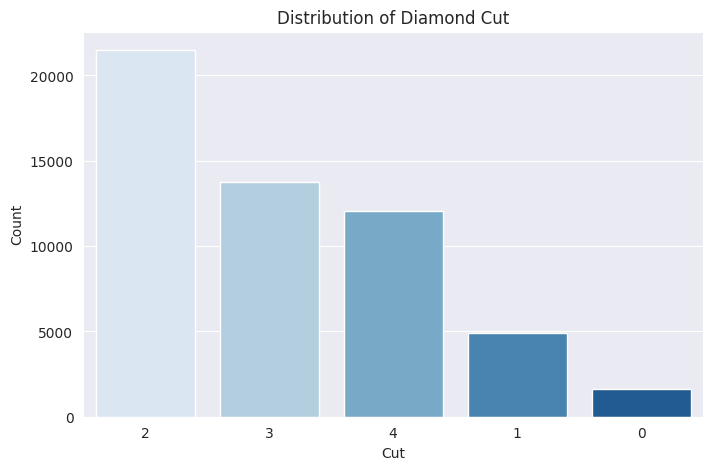

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df is already defined)
df = df.rename(columns={'x (Premium)': 'x', 'y (Good)': 'y', 'z (Very Good)': 'z'})  # Standardize column names

# Set visualization style
sns.set_style("darkgrid")

# 1. Bar Plot - Count of each diamond cut type
plt.figure(figsize=(8, 5))
sns.countplot(x='cut', data=df, order=df['cut'].value_counts().index, palette="Blues")
plt.title("Distribution of Diamond Cut")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()

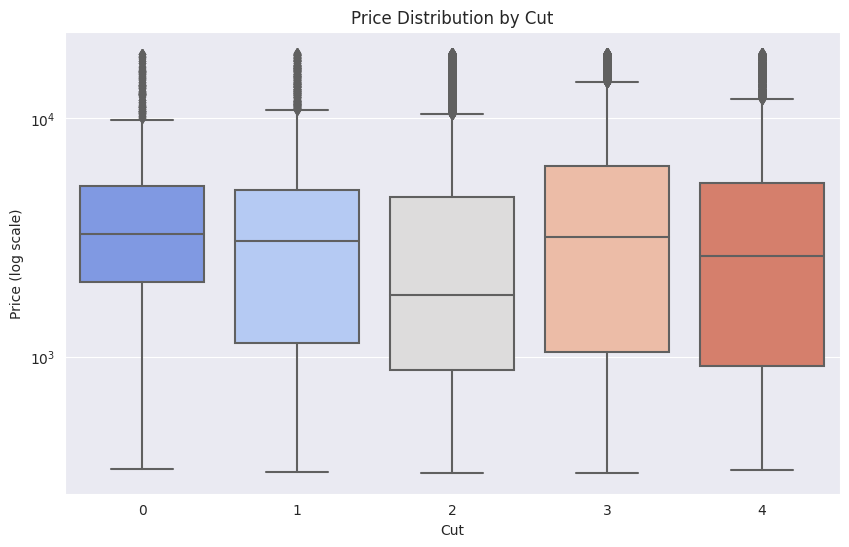

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df, palette="coolwarm")
plt.yscale('log')  # Log scale for better visualization
plt.title("Price Distribution by Cut")
plt.xlabel("Cut")
plt.ylabel("Price (log scale)")
plt.show()

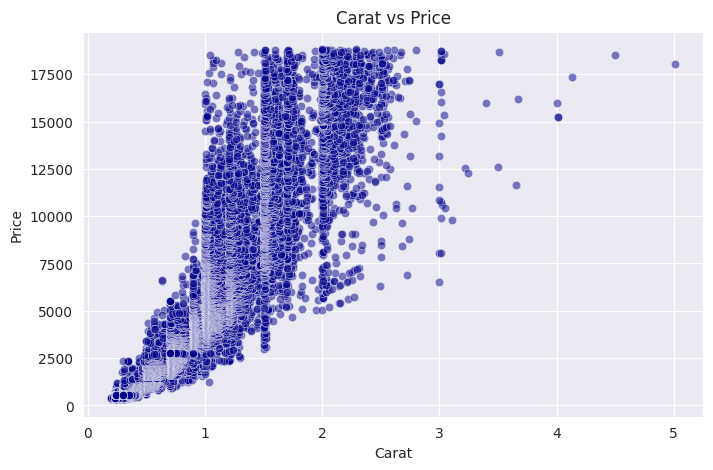

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.5, color="darkblue")
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

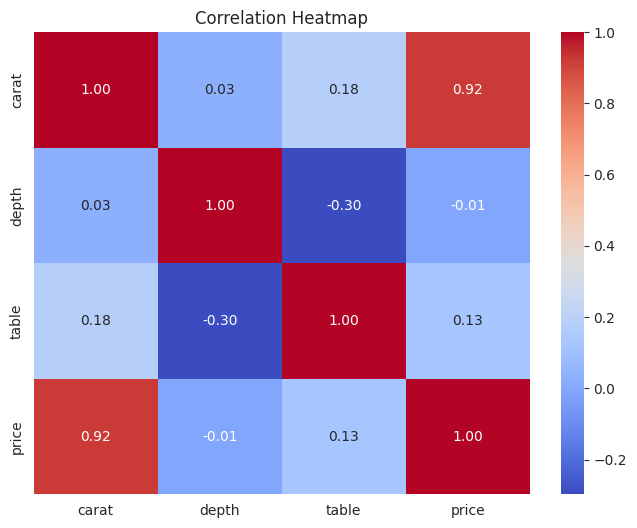

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['carat', 'depth', 'table', 'price']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
ss=StandardScaler()
x=df.drop(["price"],axis=1)
y=df["price"]

## ACCURACY

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train=ss.fit_transform(x_train)

In [29]:
x_test=ss.transform(x_test)

In [30]:
models={
    "Random Forest Regresion":RandomForestRegressor(),
    
     "Ada Boost Regression":AdaBoostRegressor(),
    
    "Gradient Boost Regression":GradientBoostingRegressor(),
    
    "Linear Regression":LinearRegression()
}

In [31]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=r2_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")

Random Forest Regresion
98.0881424478641
Ada Boost Regression
88.80198195642646
Gradient Boost Regression
97.10227529268927
Linear Regression
87.94151773697457


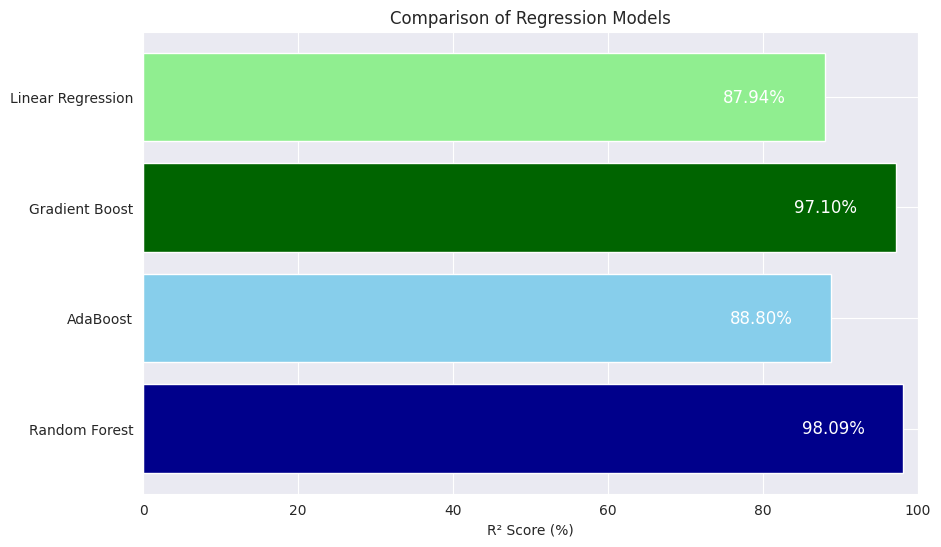

In [33]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'Linear Regression']
scores = [98.0881424478641, 88.80198195642646, 97.10227529268927, 87.94151773697457]
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color=['darkblue', 'skyblue', 'darkgreen', 'lightgreen'])
plt.xlabel("R² Score (%)")
plt.title("Comparison of Regression Models")
plt.xlim(0, 100)
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', 
             va='center', ha='right', color='white', fontsize=12)
plt.show()


## Conclusion:
Based on the comparison of regression models, we can observe the following insights:

Random Forest Regression emerged as the best-performing model with an R² score of 98.09%, indicating it explains the most variance in the data and provides the most accurate predictions.

Gradient Boosting Regression also performed very well, with an R² score of 97.10%, which makes it a strong contender for modeling tasks where performance is crucial.

AdaBoost Regression had a respectable R² score of 88.80%, suggesting it performs decently but lags behind the top two models in terms of predictive accuracy.

Linear Regression, with an R² score of 87.94%, showed the lowest performance, highlighting its limitations in capturing complex relationships in the dataset.

**Key Takeaways:
Models like Random Forest and Gradient Boosting are more suitable for this dataset, offering better performance in terms of prediction accuracy.
Linear Regression might be considered when interpretability is a priority, though its predictive power is lower compared to ensemble methods.**

## Thank you!!!